In [24]:
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
fashion_mnist = tf.keras.datasets.fashion_mnist  # fashion_mnist is a dataset of 28x28 images of fashion items and their labels

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
class_names = np.unique(train_labels)

print('Training dataset:\n\timages={}, labels={}'.format(train_images.shape, train_labels.shape))
print('Testing data shape:\n\timages={}, labels={}'.format(test_images.shape, test_labels.shape))

print('Total number of outputs: ', len(class_names))
print('Output classes: ', class_names)

Training dataset:
	images=(60000, 28, 28), labels=(60000,)
Testing data shape:
	images=(10000, 28, 28), labels=(10000,)
Total number of outputs:  10
Output classes:  [0 1 2 3 4 5 6 7 8 9]


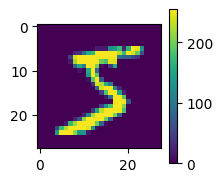

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(2, 2))
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [26]:
### Reshaping and Scaling values to a range of 0 to 1
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255.0

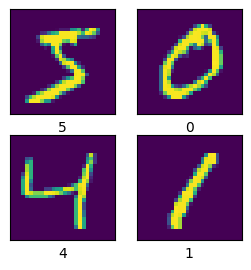

In [27]:
# Checking the first 4 images in the training dataset

plt.figure(figsize=(3, 3))
for index in range(4):
    plt.subplot(2, 2, index + 1)
    plt.xticks(ticks=[])
    plt.yticks(ticks=[])
    plt.imshow(train_images[index])
    plt.xlabel(class_names[train_labels[index]])

In [28]:
# Model creating function
def create_model():
    m = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    m.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return m


model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [29]:
# Training the model
batch_size = 128
epochs_amount = 5


class ValidationCallback(tf.keras.callbacks.Callback):
    def __init__(self, val_images, val_labels, val_batch_size=128):
        super().__init__()
        self.callback_batch_size = val_batch_size
        self.images = val_images
        self.labels = val_labels
        self.losses = []
        self.accuracies = []

    def on_train_batch_end(self, epoch, logs=None):
        batch_amount = (10000 // self.callback_batch_size)  # run validation every
        if epoch != 0 and epoch % batch_amount == 0 and logs is not None:
            val_loss, val_acc = self.model.evaluate(self.images, self.labels, verbose=0)
            print('\tValidation loss: {}, Validation accuracy: {:}'.format(val_loss, val_acc))
            self.losses.append(val_loss)
            self.accuracies.append(val_acc)

test_callback = ValidationCallback(test_images, test_labels)
model.fit(train_images, train_labels, epochs=epochs_amount, batch_size=batch_size, callbacks=[test_callback])

Epoch 1/2
469/469 [==============================] - 42s 87ms/step - loss: 0.0553 - accuracy: 0.9831
Epoch 2/2
469/469 [==============================] - 44s 94ms/step - loss: 0.0467 - accuracy: 0.9848


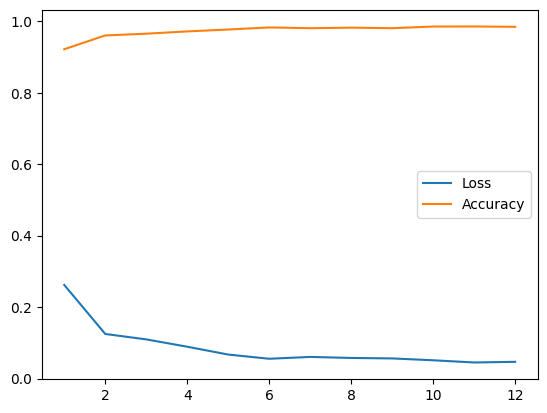

In [30]:
plt.plot(range(1, 6 * epochs_amount + 1), test_callback.losses, label="Loss")
plt.plot(range(1, 6 * epochs_amount + 1), test_callback.accuracies, label="Accuracy")
plt.legend()

In [31]:
# Evaluating the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 1s - loss: 0.0467 - accuracy: 0.9848 - 1s/epoch - 4ms/step
Test accuracy: 0.9847999811172485


In [40]:
# Saving model weights
model.save_weights('./checkpoints/mnist_model_weights.h5')

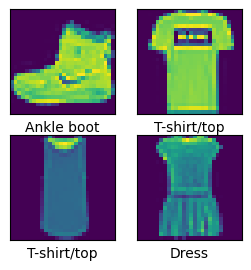

In [75]:
model_fashion_mnist = create_model()
(fashion_mnist_train_images, fashion_mnist_train_labels), (
    fashion_mnist_test_images, fashion_mnist_test_labels) = fashion_mnist.load_data()

fashion_mnist_train_images = fashion_mnist_train_images.reshape((60000, 28, 28, 1))
fashion_mnist_train_images = fashion_mnist_train_images.astype('float32') / 255.0
fashion_mnist_test_images = fashion_mnist_test_images.reshape((10000, 28, 28, 1))
fashion_mnist_test_images = fashion_mnist_test_images.astype('float32') / 255.0

fashion_class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(3, 3))
for index in range(4):
    plt.subplot(2, 2, index + 1)
    plt.xticks(ticks=[])
    plt.yticks(ticks=[])
    plt.imshow(fashion_mnist_train_images[index])
    plt.xlabel(fashion_class_names[fashion_mnist_train_labels[index]])

In [67]:
test_callback_fashion_mnist = ValidationCallback(fashion_mnist_test_images, fashion_mnist_test_labels)
model_fashion_mnist.fit(
    fashion_mnist_train_images,
    fashion_mnist_train_labels,
    epochs=epochs_amount,
    batch_size=batch_size,
    callbacks=[test_callback_fashion_mnist]
)

Epoch 1/2
469/469 [==============================] - 47s 99ms/step - loss: 0.4417 - accuracy: 0.8392
Epoch 2/2
469/469 [==============================] - 50s 107ms/step - loss: 0.4099 - accuracy: 0.8500


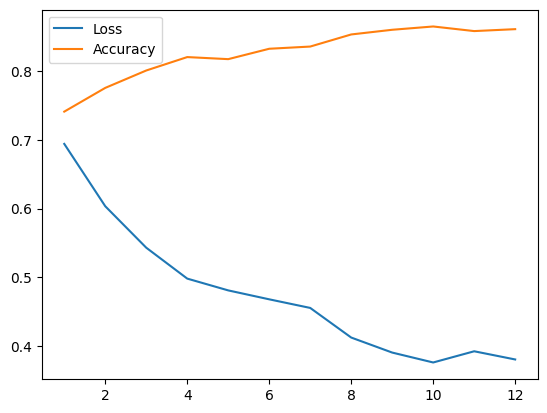

In [59]:
plt.plot(range(1, 6 * epochs_amount + 1), test_callback_fashion_mnist.losses, label="Loss")
plt.plot(range(1, 6 * epochs_amount + 1), test_callback_fashion_mnist.accuracies, label="Accuracy")
plt.legend()

In [60]:
task3_model = create_model()

task3_model.load_weights('./checkpoints/mnist_model_weights.h5')

task3_test_callback = ValidationCallback(fashion_mnist_test_images, fashion_mnist_test_labels)

task3_model.fit(
    fashion_mnist_train_images,
    fashion_mnist_train_labels,
    epochs=epochs_amount,
    batch_size=batch_size,
    callbacks=[task3_test_callback]
)

Epoch 1/2
469/469 [==============================] - 48s 99ms/step - loss: 0.3974 - accuracy: 0.8589
Epoch 2/2
469/469 [==============================] - 69s 148ms/step - loss: 0.3516 - accuracy: 0.8785


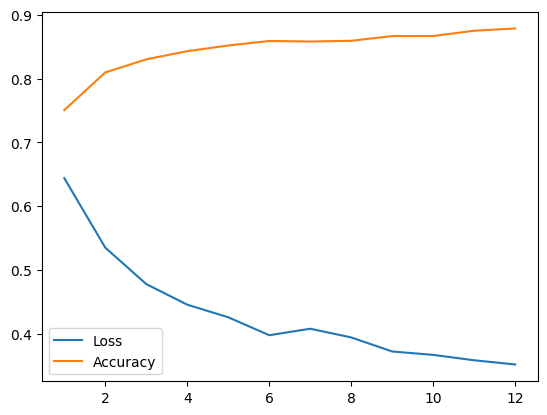

In [61]:
plt.plot(range(1, 6 * epochs_amount + 1), task3_test_callback.losses, label="Loss")
plt.plot(range(1, 6 * epochs_amount + 1), task3_test_callback.accuracies, label="Accuracy")
plt.legend()

In [62]:
task4_model = create_model()

task4_model.load_weights('./checkpoints/mnist_model_weights.h5')

# freeze convolutional layers
for layer in task4_model.layers:
    if isinstance(layer, tf.keras.layers.Conv2D):
        layer.trainable = False

task4_test_callback = ValidationCallback(fashion_mnist_test_images, fashion_mnist_test_labels)

task4_model.fit(
    fashion_mnist_train_images,
    fashion_mnist_train_labels,
    epochs=epochs_amount,
    batch_size=batch_size,
    callbacks=[task4_test_callback]
)

Epoch 1/2
469/469 [==============================] - 71s 149ms/step - loss: 0.4140 - accuracy: 0.8490
Epoch 2/2
469/469 [==============================] - 45s 96ms/step - loss: 0.3501 - accuracy: 0.8780


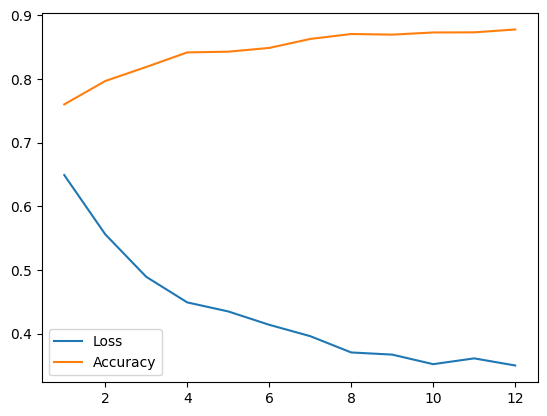

In [63]:
plt.plot(range(1, 6 * epochs_amount + 1), task4_test_callback.losses, label="Loss")
plt.plot(range(1, 6 * epochs_amount + 1), task4_test_callback.accuracies, label="Accuracy")
plt.legend()

In [64]:
epochs_amount = 2

task5_model = create_model()

task5_model.load_weights('./checkpoints/mnist_model_weights.h5')

# freeze convolutional layers
for layer in task5_model.layers:
    if isinstance(layer, tf.keras.layers.Conv2D):
        layer.trainable = False

task5_test_callback_freeze = ValidationCallback(fashion_mnist_test_images, fashion_mnist_test_labels)

task5_model.fit(
    fashion_mnist_train_images,
    fashion_mnist_train_labels,
    epochs=epochs_amount,
    batch_size=batch_size,
    callbacks=[task5_test_callback_freeze]
)

task5_test_callback_unfreeze = ValidationCallback(fashion_mnist_test_images, fashion_mnist_test_labels)

# unfreeze convolutional layers
for layer in task5_model.layers:
    if isinstance(layer, tf.keras.layers.Conv2D):
        layer.trainable = True

task5_model.fit(
    fashion_mnist_train_images,
    fashion_mnist_train_labels,
    epochs=epochs_amount,
    batch_size=batch_size,
    callbacks=[task5_test_callback_unfreeze]
)

Epoch 1/2
469/469 [==============================] - 68s 142ms/step - loss: 0.3949 - accuracy: 0.8632
Epoch 2/2
469/469 [==============================] - 45s 97ms/step - loss: 0.3438 - accuracy: 0.8787
Epoch 1/2
469/469 [==============================] - 44s 94ms/step - loss: 0.3148 - accuracy: 0.8890
Epoch 2/2
469/469 [==============================] - 44s 93ms/step - loss: 0.3002 - accuracy: 0.8940


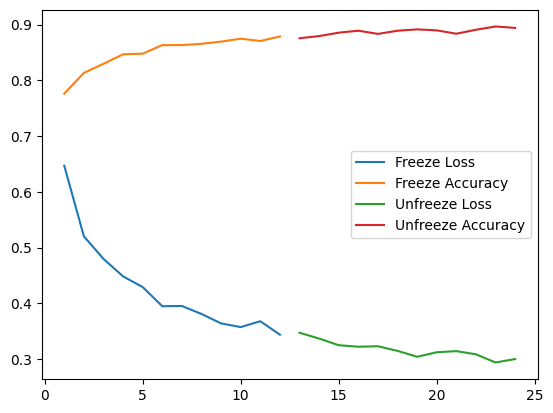

In [65]:
interval = 6 * epochs_amount
start_freeze = 1
end_freeze = start_unfreeze = start_freeze + interval
end_unfreeze = start_unfreeze + interval

plt.plot(range(start_freeze, end_freeze), task5_test_callback_freeze.losses, label="Freeze Loss")
plt.plot(range(start_freeze, end_freeze), task5_test_callback_freeze.accuracies, label="Freeze Accuracy")
plt.plot(range(start_unfreeze, end_unfreeze), task5_test_callback_unfreeze.losses, label="Unfreeze Loss")
plt.plot(range(start_unfreeze, end_unfreeze), task5_test_callback_unfreeze.accuracies, label="Unfreeze Accuracy")
plt.legend()